In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Train.csv")

In [2]:
df['Cost_of_the_Product']

0        177
1        216
2        183
3        176
4        184
        ... 
10994    252
10995    232
10996    242
10997    223
10998    155
Name: Cost_of_the_Product, Length: 10999, dtype: int64

In [3]:
df['Cost_of_the_Product'].value_counts()
df['Weight_in_gms'].value_counts()
df['Weight_in_gms'].iloc[0:20]
df['Reached.on.Time_Y.N'].unique()

array([1, 0])

In [4]:
df['Warehouse_block'].unique()

array(['D', 'F', 'A', 'B', 'C'], dtype=object)

In [6]:
df['Customer_care_calls'].unique()

array([4, 2, 3, 5, 6, 7])

In [7]:
df['Customer_care_calls'].value_counts()

Customer_care_calls
4    3557
3    3217
5    2328
6    1013
2     638
7     246
Name: count, dtype: int64

In [8]:
df.groupby('Customer_care_calls')['Reached.on.Time_Y.N'].mean()


Customer_care_calls
2    0.652038
3    0.625117
4    0.597695
5    0.584192
6    0.516288
7    0.516260
Name: Reached.on.Time_Y.N, dtype: float64

In [9]:
df.groupby('Mode_of_Shipment')['Reached.on.Time_Y.N'].mean()
df.groupby('Warehouse_block')['Reached.on.Time_Y.N'].mean()
df.groupby('Product_importance')['Reached.on.Time_Y.N'].mean()


Product_importance
high      0.649789
low       0.592788
medium    0.590450
Name: Reached.on.Time_Y.N, dtype: float64

In [10]:
df.skew(numeric_only=True)


ID                     0.000000
Customer_care_calls    0.391926
Customer_rating        0.004360
Cost_of_the_Product   -0.157117
Prior_purchases        1.681897
Discount_offered       1.798929
Weight_in_gms         -0.249747
Reached.on.Time_Y.N   -0.394257
dtype: float64

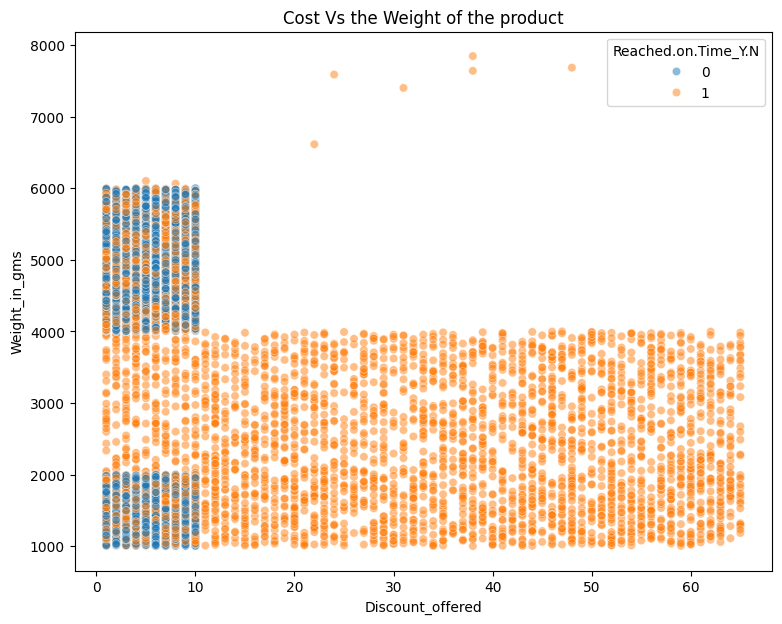

In [18]:
#Scatter Plot
plt.figure(figsize=(9,7))
sns.scatterplot(x='Discount_offered',y='Weight_in_gms', hue='Reached.on.Time_Y.N',data=df,alpha = 0.5)
plt.title("Cost Vs the Weight of the product")
plt.show()

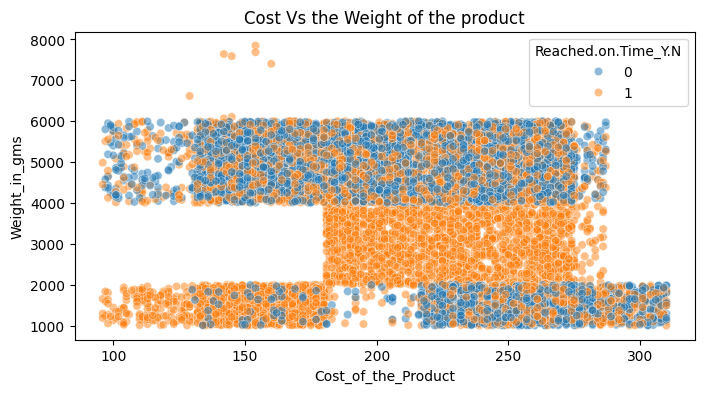

In [19]:
#Scatter Plot
plt.figure(figsize=(8,4))
sns.scatterplot(x='Cost_of_the_Product',y='Weight_in_gms', hue='Reached.on.Time_Y.N',data=df,alpha = 0.5)
plt.title("Cost Vs the Weight of the product")
plt.show()

In [20]:
print("Pivot Table: Average Customer Rating")
pivot1 = df.pivot_table(values = 'Customer_rating',index = "Warehouse_block",columns="Mode_of_Shipment",aggfunc='mean')
display(pivot1)

Pivot Table: Average Customer Rating


Mode_of_Shipment,Flight,Road,Ship
Warehouse_block,,,
A,3.070707,2.812925,2.964573
B,2.996622,3.000000,2.971842
C,2.932203,3.068027,2.991158
D,2.818182,3.219178,3.018474
F,3.038851,2.936860,3.000804


In [21]:
avg_cost = df['Cost_of_the_Product'].mean()
avg_cost

np.float64(210.19683607600692)

In [22]:
high_cost = df[df['Cost_of_the_Product']>avg_cost]
high_cost
print(f"Number of high Cost Shipments (>{avg_cost:.2f}):{len(high_cost)}")

Number of high Cost Shipments (>210.20):5714


In [23]:
high_imp_discount = df[df['Product_importance'] == 'high']['Discount_offered'].mean()
print(f"Average Discount for high importance products {high_imp_discount} ")

Average Discount for high importance products 14.666666666666666 


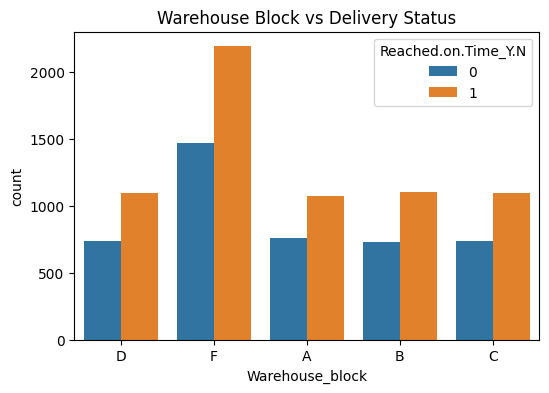

In [24]:
plt.figure(figsize=(6,4))
sns.countplot(x='Warehouse_block', 
              hue='Reached.on.Time_Y.N', 
              data=df)
plt.title("Warehouse Block vs Delivery Status")
plt.show()


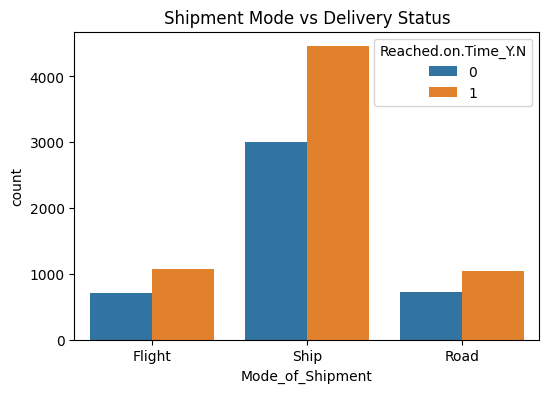

In [25]:
plt.figure(figsize=(6,4))
sns.countplot(x='Mode_of_Shipment', 
              hue='Reached.on.Time_Y.N', 
              data=df)
plt.title("Shipment Mode vs Delivery Status")
plt.show()


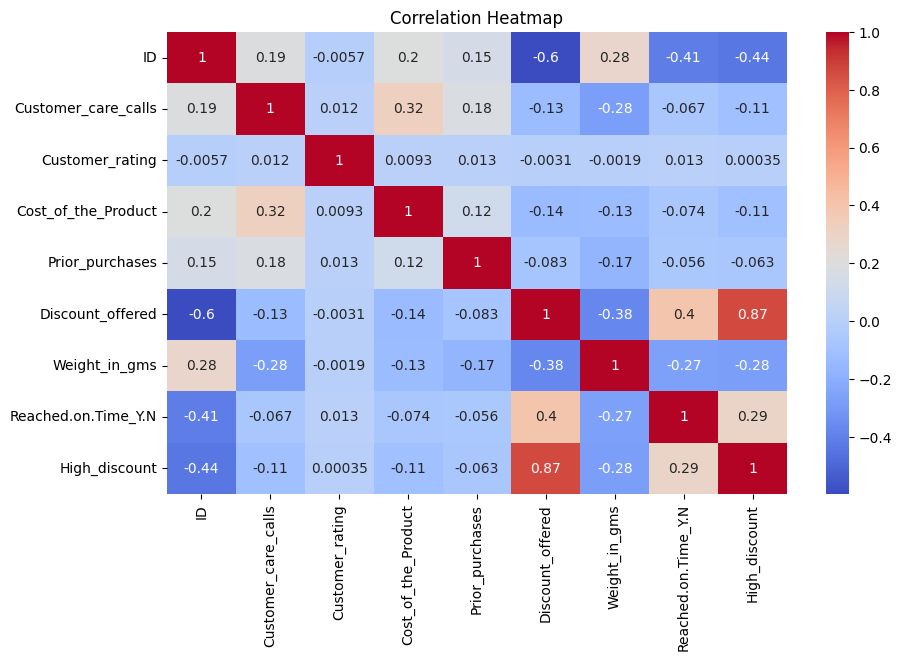

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), 
            annot=True, 
            cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()